# python 绘制非线性支持向量机

## 1. 引入模块

In [209]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import sklearn
from sklearn import svm

## 2. 读取数据

In [210]:
excel = xlrd.open_workbook("C:\\Users\\syl\\Desktop\\工作簿1.xls")
data2=excel.sheet_by_name('data2')
data_row = []
x=[]
y=[]
labels=data2.row_values(0)
for row in range(1,data2.nrows):
    y.append(data2.row_values(row))
    x.append(row)

# print(x)
# print(y)

## 3. 绘制图像

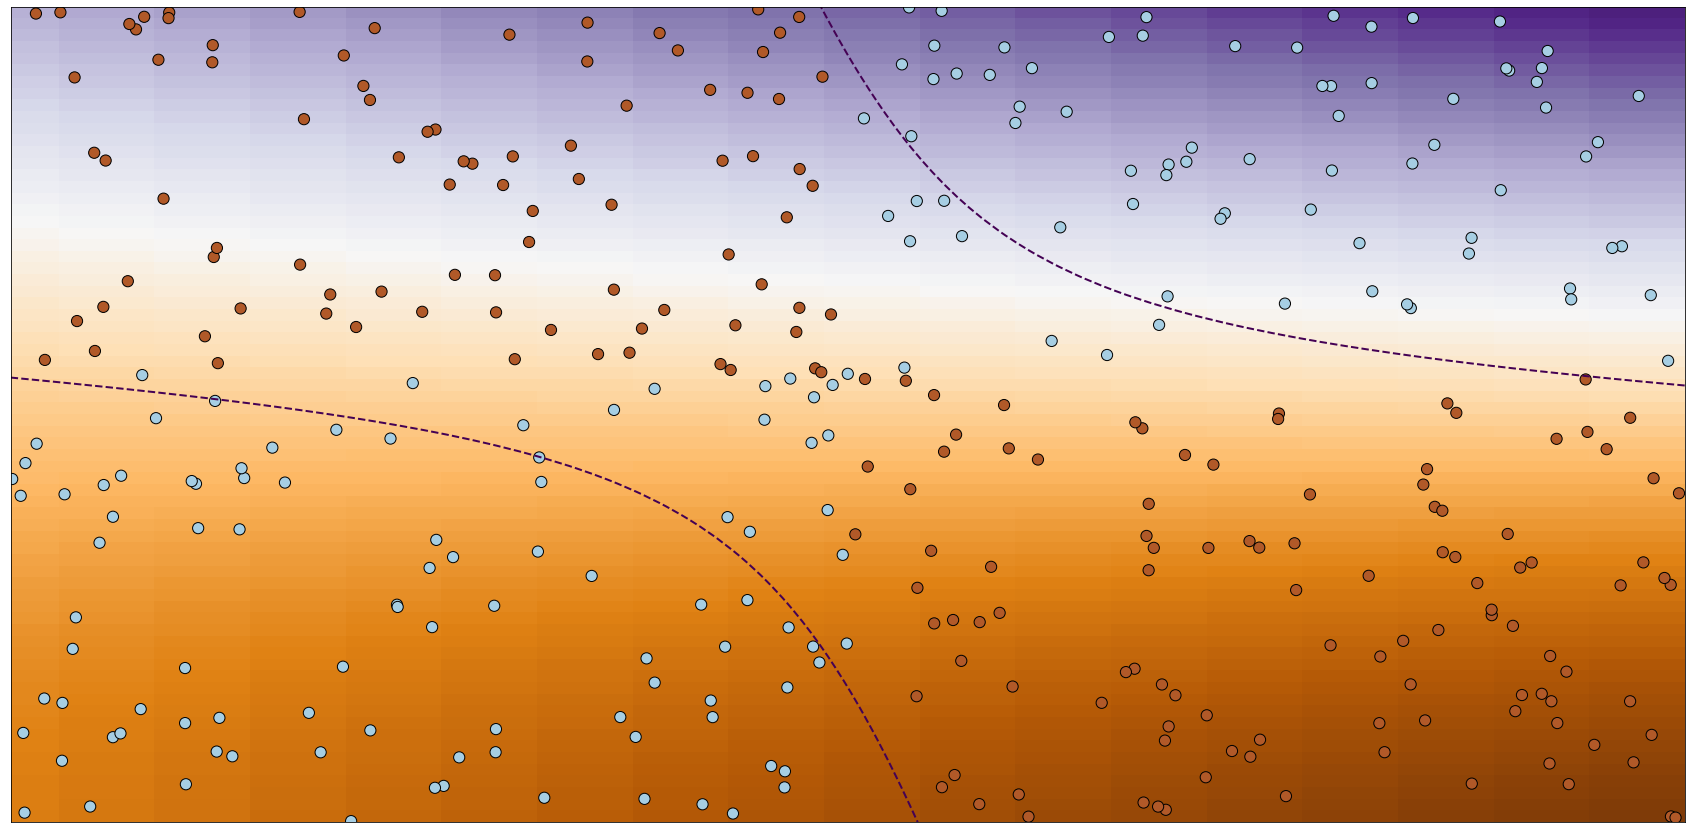

In [226]:
ax, ay = np.meshgrid(np.linspace(0, 1, 70),
                     np.linspace(0, 1, 70))


X=np.array(y)
Y_XOR = np.logical_xor(X[:, 0] > 0.5,X[:, 1] > 0.55)


# 拟合模型
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y_XOR)

plt.figure(figsize=(30, 15))
# 在网格上为每个数据点绘制决策函数
Z = clf.decision_function(np.c_[ax.ravel(), ay.ravel()])
Z = Z.reshape(ax.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), ax.max(), ay.min(), ay.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(ax, ay, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=500, c=Y_XOR, cmap=plt.cm.Paired,
            edgecolors='k',marker=".")
plt.xticks(())
plt.yticks(())
plt.axis([0, 1, 0, 1])



plt.show()
